# Prodigy InfoTech DS Task 5.

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

## Done By:- GONUGUNTA VENKATA balaji

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#--------------------------------------------------
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#--------------------------------------------------
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# USA-Accidents-EDA

**EXPLORATORY DATA ANALYSIS**

# Preparation and Cleaning 

In [2]:
df = pd.read_csv("US_Accidents_May19_Migrated Data.csv")
df

,Airport_Code,Amenity,Astronomical_Twilight,Bump,Calculation1,City,Civil_Twilight,count of Bump,Count of Crossing,count Traffic Signal,...,Humidity(%),Number of Records,Precipitation(in),Pressure(in),Records,Start_Lat,Start_Lng,TMC,Wind_Chill(F),Wind_Speed(mph)
0,NaN,False,Day,False,Remaining,Garnet Valley,Day,0,0,0,...,NaN,1,NaN,NaN,1,39.852940,-75.461739,201.0,NaN,NaN
1,KDWH,False,Day,False,Remaining,Spring,Day,0,0,0,...,82.0,1,NaN,30.02,1,30.159246,-95.510826,201.0,NaN,5.8
2,KDSM,False,Day,False,Remaining,West des Moines,Day,0,0,0,...,79.0,1,NaN,30.04,1,41.586887,-93.806496,201.0,34.3,11.5
3,KCPS,False,Day,False,Remaining,Saint Louis,Day,0,0,0,...,84.0,1,NaN,30.10,1,38.634579,-90.186806,201.0,NaN,12.7
4,KXBP,False,Day,False,Remaining,Springtown,Day,0,0,0,...,96.0,1,NaN,29.95,1,32.930958,-97.641068,201.0,NaN,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243934,KBKF,False,Day,False,Remaining,Aurora,Day,0,1,1,...,48.0,1,NaN,30.00,1,39.709507,-104.814987,201.0,NaN,5.8
2243935,KBKF,False,Day,False,Remaining,Denver,Day,0,1,1,...,55.0,1,NaN,30.01,1,39.707298,-104.922256,201.0,NaN,5.8
2243936,KCOS,False,Day,False,Remaining,Colorado Springs,Day,0,1,1,...,20.0,1,NaN,29.86,1,38.833813,-104.821724,201.0,NaN,6.9
2243937,KCOS,False,Day,False,Remaining,Colorado Springs,Day,0,1,1,...,37.0,1,NaN,30.25,1,38.795475,-104.803535,201.0,NaN,6.9


In [3]:
df.describe()

,count of Bump,Count of Crossing,count Traffic Signal,End_Lat,End_Lng,Number,Severity,Temperature(F),Visibility(mi),Count of accidents,...,Humidity(%),Number of Records,Precipitation(in),Pressure(in),Records,Start_Lat,Start_Lng,TMC,Wind_Chill(F),Wind_Speed(mph)
count,2.243939e+06,2.243939e+06,2.243939e+06,516762.000000,516762.000000,785537.000000,2.243939e+06,2.181674e+06,2.172579e+06,2.243939e+06,...,2.179472e+06,2243939.0,264473.000000,2.186659e+06,2.243939e+06,2.243939e+06,2.243939e+06,1.727177e+06,391569.000000,1.800985e+06
mean,1.065091e-04,5.427197e-02,1.598297e-01,37.443109,-96.527543,5625.281008,2.382692e+00,6.123244e+01,9.124096e+00,9.997121e-01,...,6.592758e+01,1.0,0.060439,3.003747e+01,9.997121e-01,3.646348e+01,-9.485567e+01,2.073527e+02,26.042067,8.844042e+00
std,1.031978e-02,2.265536e-01,3.664481e-01,5.126585,17.986406,11071.872897,5.488029e-01,1.914616e+01,2.986359e+00,1.696478e-02,...,2.243013e+01,0.0,0.439698,2.267242e-01,1.696478e-02,4.958759e+00,1.709453e+01,1.940527e+01,13.478333,4.973200e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,24.570110,-124.497829,1.000000,0.000000e+00,-7.780000e+01,0.000000e+00,0.000000e+00,...,4.000000e+00,1.0,0.000000,0.000000e+00,0.000000e+00,2.457022e+01,-1.246238e+02,2.000000e+02,-65.900000,1.200000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,33.887450,-117.870577,803.000000,2.000000e+00,4.890000e+01,1.000000e+01,1.000000e+00,...,5.000000e+01,1.0,0.000000,2.992000e+01,1.000000e+00,3.348468e+01,-1.171362e+02,2.010000e+02,19.200000,5.800000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,38.038480,-90.192310,2672.000000,2.000000e+00,6.300000e+01,1.000000e+01,1.000000e+00,...,6.800000e+01,1.0,0.010000,3.003000e+01,1.000000e+00,3.586428e+01,-8.818469e+01,2.010000e+02,28.700000,8.100000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,41.393320,-80.895040,6846.000000,3.000000e+00,7.590000e+01,1.000000e+01,1.000000e+00,...,8.500000e+01,1.0,0.040000,3.015000e+01,1.000000e+00,4.042111e+01,-8.085453e+01,2.010000e+02,36.400000,1.150000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,49.075000,-67.109242,961052.000000,4.000000e+00,1.706000e+02,1.400000e+02,1.000000e+00,...,1.000000e+02,1.0,10.800000,3.304000e+01,1.000000e+00,4.900076e+01,-6.711317e+01,4.060000e+02,45.200000,8.228000e+02


In [4]:
excluded_describe = df.describe(exclude ='number' )
excluded_describe

,Airport_Code,Amenity,Astronomical_Twilight,Bump,Calculation1,City,Civil_Twilight,Country,County,Crossing,...,Street,Sunrise_Sunset,Timezone,Traffic_Calming,Traffic_Signal,Turning_Loop,Weather_Condition,Weather_Timestamp,Wind_Direction,Zipcode
count,2220275,2243939,2243861,2243939,2243939,2243871,2243861,2243939,2243939,2243939,...,2243939,2243861,2241798,2243939,2243939,2243939,2171935,2196769,2196749,2243293
unique,1895,2,2,2,3,11077,2,1,1682,2,...,120397,2,4,2,2,1,61,363617,18,297430
top,KMCJ,False,Day,False,Remaining,Houston,Day,US,Los Angeles,False,...,I-5 N,Day,US/Eastern,False,False,False,Clear,10/16/2018 7:53:00 AM,Calm,91706
freq,46678,2217962,1959792,2243700,1573772,76449,1761390,2243939,171981,2122156,...,25836,1647331,996341,2243321,1885291,2243939,808182,207,368269,3521


In [5]:
df.columns
for column in df.columns:
    print(column)

Airport_Code
Amenity
Astronomical_Twilight
Bump
Calculation1
City
Civil_Twilight
count of Bump
Count of Crossing
count Traffic Signal
Country
County
Crossing
Description
End_Lat
End_Lng
End_Time
Give_Way
ID
Junction
Nautical_Twilight
No_Exit
Number
Railway
Roundabout
Severity
Side
Source
Start_Time
State
Station
Stop
Street
Sunrise_Sunset
Temperature(F)
Timezone
Traffic_Calming
Traffic_Signal
Turning_Loop
Visibility(mi)
Weather_Condition
Weather_Timestamp
Wind_Direction
Zipcode
Count of accidents
count of county
Distance(mi)
Humidity(%)
Number of Records
Precipitation(in)
Pressure(in)
Records
Start_Lat
Start_Lng
TMC
Wind_Chill(F)
Wind_Speed(mph)


In [6]:
numeric = ['int64','int32','int16','float16','float32','float64']
df_numeric = df.select_dtypes(include=numeric)
len(df_numeric.columns)

22

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 57 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Airport_Code           object 
 1   Amenity                bool   
 2   Astronomical_Twilight  object 
 3   Bump                   bool   
 4   Calculation1           object 
 5   City                   object 
 6   Civil_Twilight         object 
 7   count of Bump          int64  
 8   Count of Crossing      int64  
 9   count Traffic Signal   int64  
 10  Country                object 
 11  County                 object 
 12  Crossing               bool   
 13  Description            object 
 14  End_Lat                float64
 15  End_Lng                float64
 16  End_Time               object 
 17  Give_Way               bool   
 18  ID                     object 
 19  Junction               bool   
 20  Nautical_Twilight      object 
 21  No_Exit                bool   
 22  Number            

In [8]:
missing_values = df.isnull().sum()
missing_values

Airport_Code               23664
Amenity                        0
Astronomical_Twilight         78
Bump                           0
Calculation1                   0
City                          68
Civil_Twilight                78
count of Bump                  0
Count of Crossing              0
count Traffic Signal           0
Country                        0
County                         0
Crossing                       0
Description                    1
End_Lat                  1727177
End_Lng                  1727177
End_Time                       0
Give_Way                       0
ID                             0
Junction                       0
Nautical_Twilight             78
No_Exit                        0
Number                   1458402
Railway                        0
Roundabout                     0
Severity                       0
Side                           1
Source                         0
Start_Time                     0
State                          0
Station   

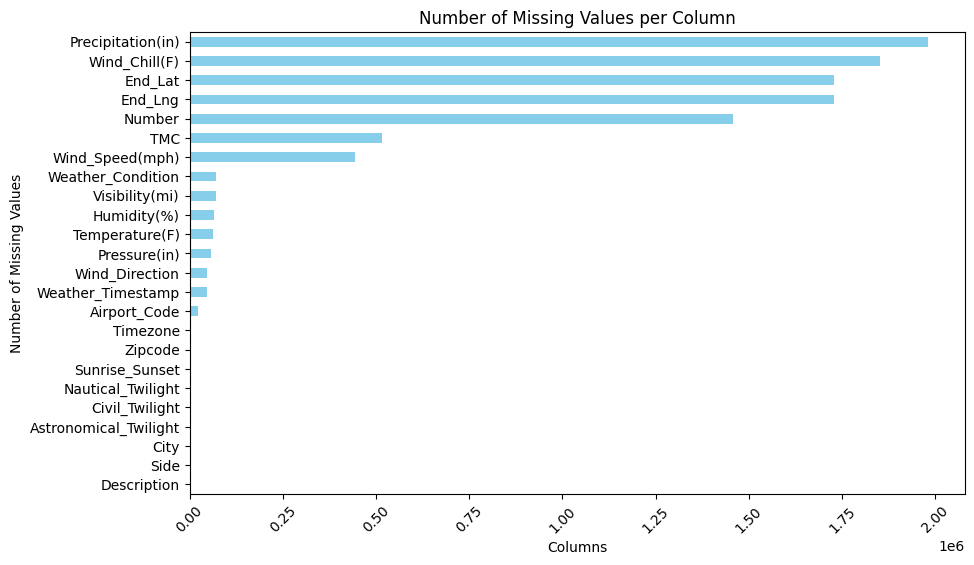

In [9]:
df_missing_values = missing_values[missing_values != 0].sort_values(ascending=True)

df_missing_values
# Plot the missing values
plt.figure(figsize=(10, 6))
df_missing_values.plot(kind='barh', color='skyblue')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

# Data Visulization

In [11]:
cities = df.City.unique()
len(cities)

11078

In [12]:
city_by_accidents = df.City.value_counts()
city_by_accidents

City
Houston          76449
Charlotte        51791
Los Angeles      49621
Dallas           46492
Austin           45683
                 ...  
Frenchburg           1
Rainsville           1
Tilleda              1
Grand View           1
Council Grove        1
Name: count, Length: 11077, dtype: int64

In [13]:
city_by_accidents[:20]

City
Houston          76449
Charlotte        51791
Los Angeles      49621
Dallas           46492
Austin           45683
Atlanta          31042
Raleigh          30705
Miami            24853
Orlando          22087
Baton Rouge      21689
Oklahoma City    21666
Nashville        20448
Seattle          19957
Sacramento       18214
San Antonio      16963
Minneapolis      15762
San Diego        15610
Omaha            15530
Phoenix          15401
Indianapolis     14846
Name: count, dtype: int64

In [14]:
'detroit' in df.City
'Detroit' in df.City

False

**THERE IS NO DETROIT SO DETROIT HAS LOW ACCIDENTS**

<Axes: ylabel='City'>

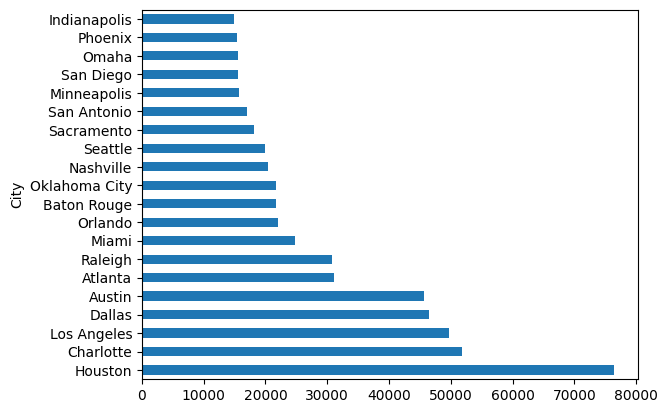

In [15]:
city_by_accidents[:20].plot(kind='barh')

C:\Users\user\AppData\Local\Temp\ipykernel_8552\475156009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(city_by_accidents)


<Axes: xlabel='count', ylabel='Density'>

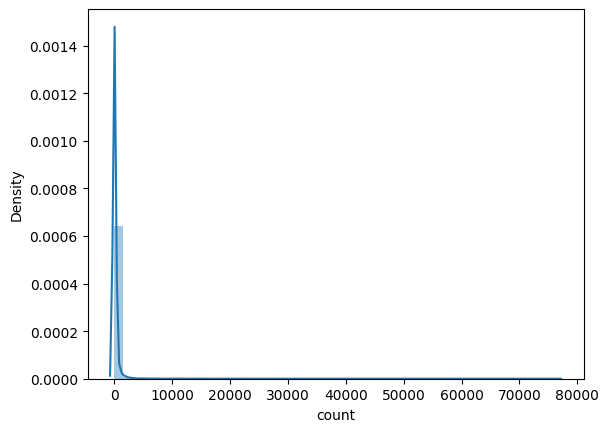

In [16]:
sns.distplot(city_by_accidents)



In [17]:
highest_accident = city_by_accidents[city_by_accidents>=1000]
lowest_accident = city_by_accidents[city_by_accidents<1000]


In [18]:
len(highest_accident)/len(cities)

0.03240657158331829

<Axes: xlabel='count', ylabel='Count'>

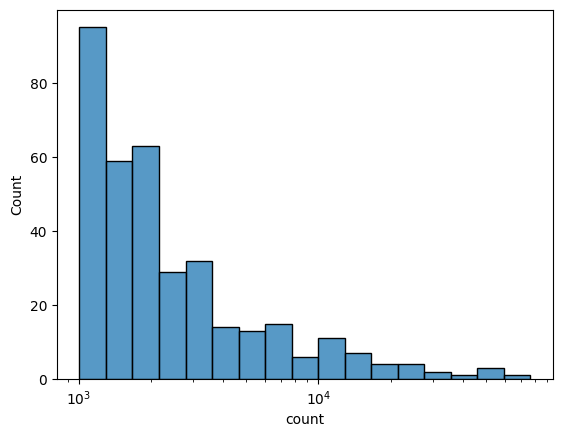

In [19]:
sns.histplot(highest_accident,log_scale=True)

**MOST CITIES HAVE ACCIDENTS CLOSE TO 1000**

<Axes: xlabel='count', ylabel='Count'>

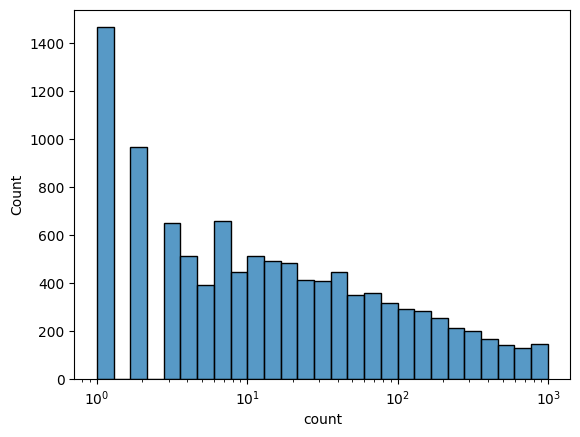

In [20]:
sns.histplot(lowest_accident,log_scale=True)

In [21]:
city_by_accidents[city_by_accidents == 1]

City
South China      1
Adamsburg        1
Emington         1
West Halifax     1
Sims             1
                ..
Frenchburg       1
Rainsville       1
Tilleda          1
Grand View       1
Council Grove    1
Name: count, Length: 1467, dtype: int64

**START TIME**

In [22]:
#pd.to_datetime('Start_Time', format = "%d/%m/%y")
df.Start_Time = pd.to_datetime(df.Start_Time)

C:\Users\user\AppData\Local\Temp\ipykernel_8552\2010393242.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Start_Time = pd.to_datetime(df.Start_Time)


C:\Users\user\AppData\Local\Temp\ipykernel_8552\2146065868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins=20,kde=False)


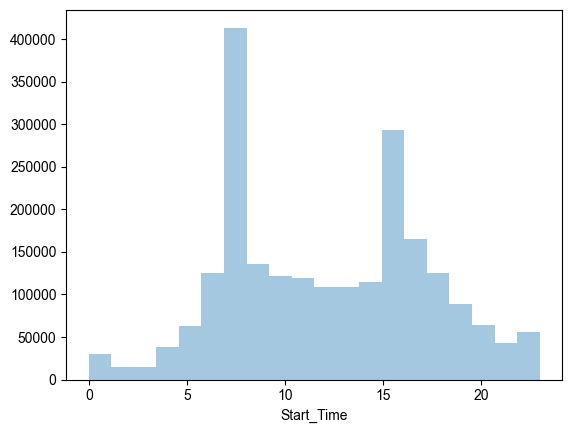

In [23]:
sns.distplot(df.Start_Time.dt.hour,bins=20,kde=False)
sns.set_style('whitegrid')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_8552\1391992391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.weekday,bins=7,norm_hist=True,kde=False)


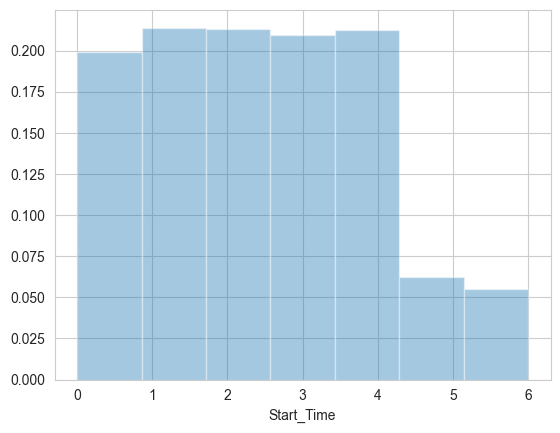

In [24]:
sns.distplot(df.Start_Time.dt.weekday,bins=7,norm_hist=True,kde=False)
plt.grid
plt.show()

In [25]:
sunday_time =df.Start_Time[df.Start_Time.dt.day_of_week==6]

C:\Users\user\AppData\Local\Temp\ipykernel_8552\4238717723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sunday_time.dt.hour, bins=24, norm_hist=True, kde = False)


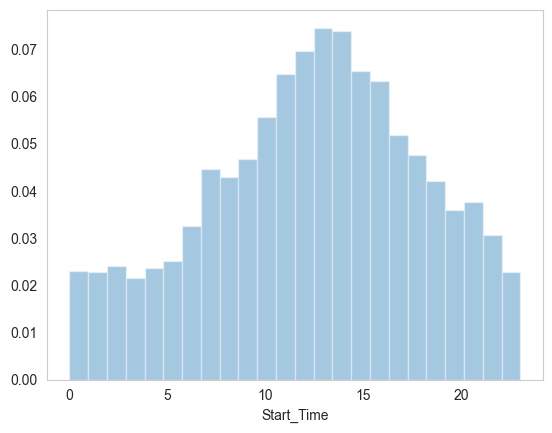

In [26]:
sns.distplot(sunday_time.dt.hour, bins=24, norm_hist=True, kde = False)
plt.grid()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8552\2954795542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month,bins=12,kde=False)


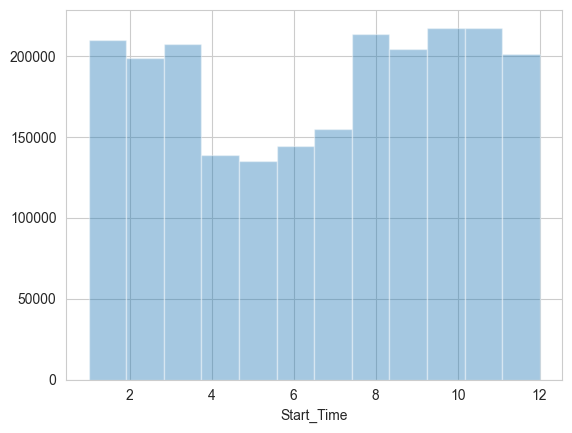

In [27]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False)
plt.show()

**MOST DEATHS ARE IN AUTUMN AND WINTER**

In [28]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2243934    2017
2243935    2017
2243936    2018
2243937    2017
2243938    2017
Name: Start_Time, Length: 2243939, dtype: int32

In [29]:
df.Source

0          MapQuest
1          MapQuest
2          MapQuest
3          MapQuest
4          MapQuest
             ...   
2243934    MapQuest
2243935    MapQuest
2243936    MapQuest
2243937    MapQuest
2243938    MapQuest
Name: Source, Length: 2243939, dtype: object

In [30]:
df_2016= df.Start_Time.dt.year == 2016
df_2016

0           True
1           True
2           True
3           True
4           True
           ...  
2243934    False
2243935    False
2243936    False
2243937    False
2243938    False
Name: Start_Time, Length: 2243939, dtype: bool

In [31]:
if 'MapQuest' in df.Source:
    print('Yes')

# ANALYSIS ON ACCIDENTS BY YEARS

C:\Users\user\AppData\Local\Temp\ipykernel_8552\3990459467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2016.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)


<Axes: xlabel='Start_Time'>

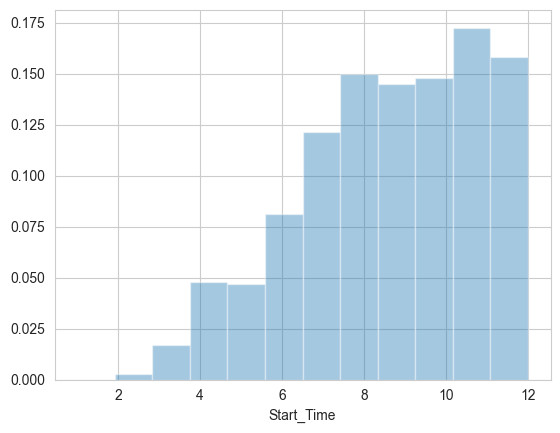

In [32]:
df_2016= df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)

C:\Users\user\AppData\Local\Temp\ipykernel_8552\1464067620.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2017.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)


<Axes: xlabel='Start_Time'>

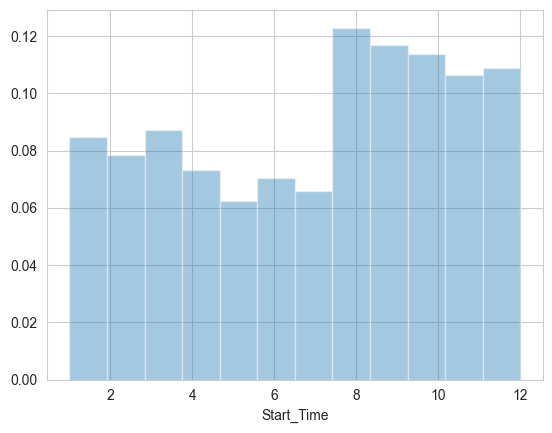

In [33]:
df_2017= df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)

C:\Users\user\AppData\Local\Temp\ipykernel_8552\1750430829.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2018.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)


<Axes: xlabel='Start_Time'>

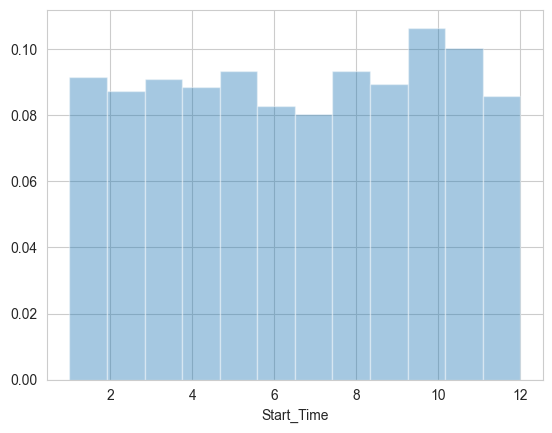

In [34]:
df_2018= df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)

C:\Users\user\AppData\Local\Temp\ipykernel_8552\3584003554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)


<Axes: xlabel='Start_Time'>

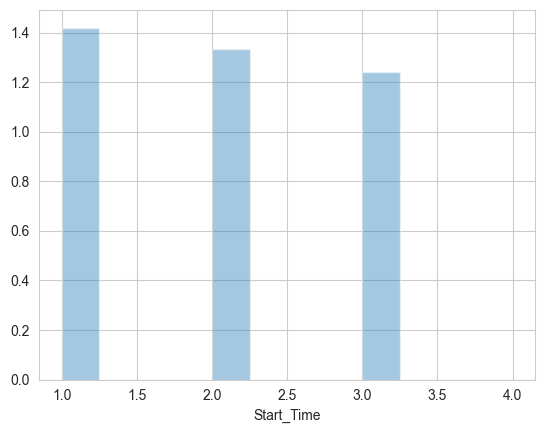

In [35]:
df_2019= df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, norm_hist=True, kde = False)